In [6]:
#import numpy as np
#from operator import itemgetter
#from igraph import Graph as IGraph
#igraph_pagerank

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [8]:
tsne = TSNE(n_components=2,early_exaggeration=12.0,learning_rate=200,n_iter=10000,init='pca')

dbscan = DBSCAN(eps=2.75, min_samples=8)

In [9]:
S1 = ['He','Li','Be','Ne','Na','Ma','Al','Si','Cl','Ar','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga','Ge','As','Se','Br','Kr','Rb','Sr','Y','Zr','Nb','Mo','Tc','Ru','Rh','Pd','Ag','Cd','In','Sn','Sb','Te','Xe','Cs','Ba','La','Ce','Pr','Nd','Pm','Sm','Eu','Gd','Tb','Dy','Ho','Er','Tm','Yb','Lu','Hf','Ta','W','Re','Os','Ir','Pt','Au','Hg','Tl','Pb','Bi','Po','At','Rn','Fr','Ra','Ac','Th','Pa','U','Np','Pu','Am','Cm','Bk','Cf','Es','Fm','Md','No','Lr']
S2 = ['He','Hf','Hg','Ho']
S3 = ['Be','Br','Ba','Bi','Bk']
S4 = ['Cl','Ca','Cr','Co','Cu','Cd','Cs','Ce','Cm','Cf']
S5 = ['Nb','Ne','Na','Ni','Nd','Np','No']
S6 = ['Os']
S7 = ['Fr','Fe','Fm']
S8 = ['Pd','Pr','Pm','Pt','Pb','Po','Pa','Pu']
S9 = ['Sc','Sr','Sn','Sb','Sm','Si','Se']
S10 = ['Kr']
S11 = ['Yb']
S12 = ['I','In','Tl','Ir']

def JiShu(tmp,outfile):
    word = tmp
    w = []
    s = []
    
    for a in S1:
        i = 0
        for b in word:
            i = b.count(a) + i
    s.append(i)
    w.append(a)

    j = 0
    for b in word:
        j = b.count('H') + j
    for a in S2:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('H')

    j = 0
    for b in word:
        j = b.count('B') + j
    for a in S3:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('B')

    j = 0
    for b in word:
        j = b.count('C') + j
    for a in S4:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('C')

    j = 0
    for b in word:
        j = b.count('N') + j
    for a in S5:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('N')

    j = 0
    for b in word:
        j = b.count('O') + j
    for a in S6:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('O')

    j = 0
    for b in word:
        j = b.count('F') + j
    for a in S7:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('F')

    j = 0
    for b in word:
        j = b.count('P') + j
    for a in S8:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('P')

    j = 0
    for b in word:
        j = b.count('S') + j
    for a in S9:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('S')

    j = 0
    for b in word:
        j = b.count('K') + j
    for a in S10:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('K')

    j = 0
    for b in word:
        j = b.count('Y') + j
    for a in S11:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('Y')
    
    j = 0
    for b in word:
        j = b.count('I') + j
    for a in S12:
        for b in word:
            j = j - b.count(a)
    s.append(j)
    w.append('I') 
    
    DF1 = pd.DataFrame({'w':w,'s':s})
    DF2 = DF1.sort_values(by='s',ascending=False)
    DF3 = DF2[0:10]
    DF3_X = DF3['w']
    DF3_Y = DF3['s']
    plt.bar(DF3_X,DF3_Y)
    plt.savefig(outfile)
    plt.show()

In [10]:
def create_data(N,tmp_): # random > alpha, then here is a edge.
    G = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                continue
            n = model.wv.similarity(tmp_[i],tmp_[j])
            G[i][j] = n
    return G

def GtoM(G, N):
    M = np.zeros((N, N))
    for i in range(N):
        D_i = sum(G[i])
        if D_i == 0:
            continue
        for j in range(N):
            M[j][i] = G[i][j] / D_i # watch out! M_j_i instead of M_i_j
    return M

def PageRank(M, N, T, eps=1e-6, beta=0.85):
    R = np.ones(N) / N
    teleport = np.ones(N) / N
    for time in range(T):
        R_new = beta * np.dot(M, R) + (1-beta)*teleport
        if np.linalg.norm(R_new - R) < eps:
            break
        R = R_new.copy()
    return R_new

In [11]:
model = Word2Vec.load('./model/word2vec_C.model')
data = pd.read_csv('./data/C/tmp.txt', sep='\t', header=None, names=['化学式'])
tmp = list(data['化学式'])

vectors = model[tmp]
embedd = tsne.fit_transform(vectors)

dbscan.fit(embedd)
label_pred = dbscan.labels_

n_clusters_ = len(set(label_pred)) - (1 if -1 in label_pred else 0)

<ipython-input-11-8b63577e37d5>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = model[tmp]


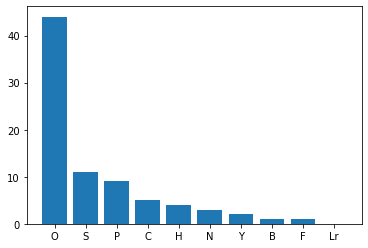

In [13]:
a = tmp.index('LiFePO4')
b = embedd[a]

i = 0
j = 0
tmp2 = []
x = {}
while i<n_clusters_:
    x[i] = embedd[label_pred == i]
    if b in x[i]:
        c = i
    i +=1
    
y = embedd[label_pred == c]
for w in embedd:
    if w in y:
        tmp2.append(tmp[j])
    j += 1
    
N = len(tmp2)
G = create_data(N,tmp2)
M = GtoM(G, N)
values = PageRank(M, N, T=100)

df = pd.DataFrame({'words':tmp2,'values':values})
df.to_csv('./data/C/排名/LiFePO4.csv')
outfile = './data/C/图片/LiFePO4_PageRank.jpg'
X = JiShu(tmp2,outfile)

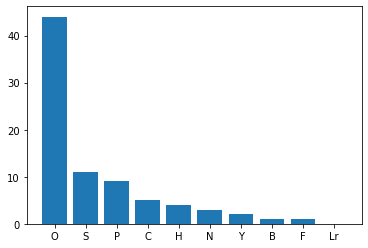

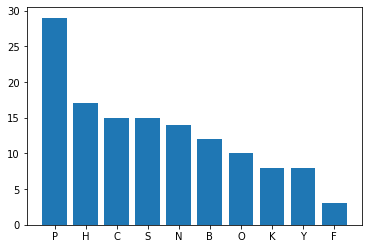

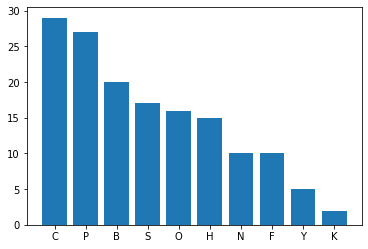

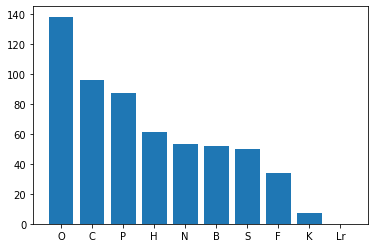

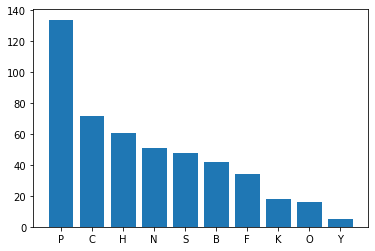

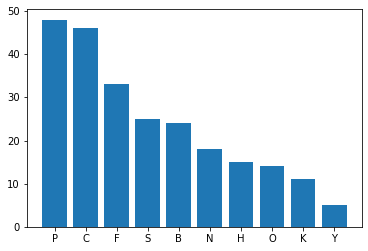

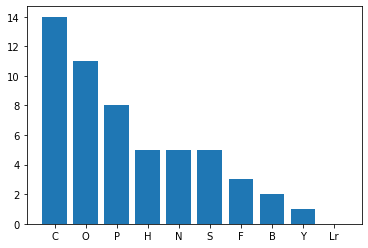

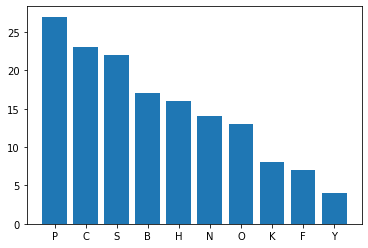

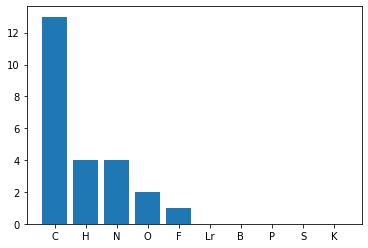

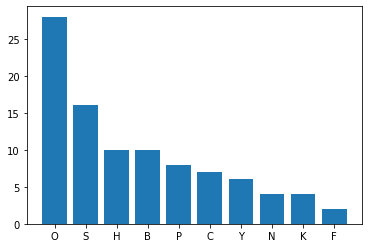

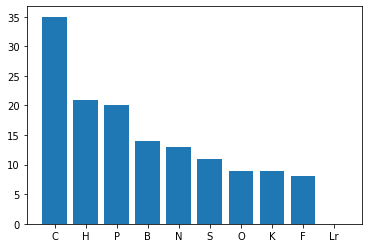

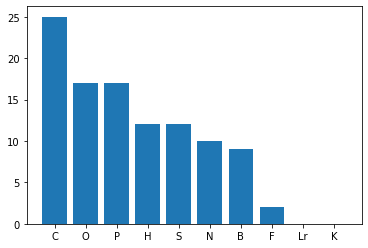

In [14]:
i = 0
tmp4 = []
while i<n_clusters_:
    x[i] = embedd[label_pred == i]
    if len(x[i])>100:
        tmp4.append(i)
    i += 1

path1 = './data/C/排名/'
path2 = './data/C/图片/'
for a in tmp4:
    file_name1 = path1 + str(a)
    file_name2 = path2 + str(a)
    tmp3 = []
    i = 0
    y = embedd[label_pred == a]
    for w in embedd:
        if w in y:
            tmp3.append(tmp[i])
        i += 1

    N = len(tmp3)
    G = create_data(N,tmp3)
    M = GtoM(G, N)
    values = PageRank(M, N, T=100)       
    df = pd.DataFrame({'words':tmp3,'values':values})
    df.to_csv(file_name1+'.csv')
    X = JiShu(tmp3,file_name2+'.jpg')

In [15]:
N = len(tmp)
G = create_data(N,tmp)
M = GtoM(G,N)
values = PageRank(M,N,T=100)

df = pd.DataFrame({'words':tmp,'values':values})
df.to_csv('./data/C/排名/electrolyte.csv')